In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

In [28]:
X_train_array = np.load("kmnist-train-imgs.npz")["arr_0"].reshape(60000,784)
y_train_array = np.load("kmnist-train-labels.npz")["arr_0"]
X_test_array = np.load("kmnist-test-imgs.npz")["arr_0"].reshape(10000,784)
y_test_array = np.load("kmnist-test-labels.npz")["arr_0"]

In [33]:
X_train = X_train_array/255.0
X_test = X_test_array/255.0

In [34]:
import tensorflow as tf
from tensorflow import keras

In [40]:
model = keras.Sequential(
    [
        keras.Input(shape=(28*28,)),
        keras.layers.Dense(512,activation="relu"),
        keras.layers.Dense(256, activation='relu'),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(10),
    ]
)

print(model.summary())

model.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer = keras.optimizers.SGD(),
    metrics = ["accuracy"]
)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 567,434 (2.16 MB)

 Trainable params: 567,434 (2.16 MB)

 Non-trainable params: 0 (0.00 B)

None


In [41]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.6137 - loss: 1.2891
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.8750 - loss: 0.4231
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9055 - loss: 0.3181
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9277 - loss: 0.2486
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9429 - loss: 0.2036
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9517 - loss: 0.1706
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9593 - loss: 0.1483
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9669 - loss: 0.1202
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9749 - loss: 0.0993
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9785 - loss: 0.0849


In [42]:
y_predicted=model.predict(X_test)
y_pred = [np.argmax(i) for i in y_predicted]

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


In [43]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.90      0.91      1000
           1       0.87      0.86      0.87      1000
           2       0.81      0.83      0.82      1000
           3       0.91      0.94      0.93      1000
           4       0.89      0.85      0.87      1000
           5       0.92      0.87      0.89      1000
           6       0.85      0.93      0.89      1000
           7       0.91      0.87      0.89      1000
           8       0.89      0.90      0.90      1000
           9       0.91      0.89      0.90      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



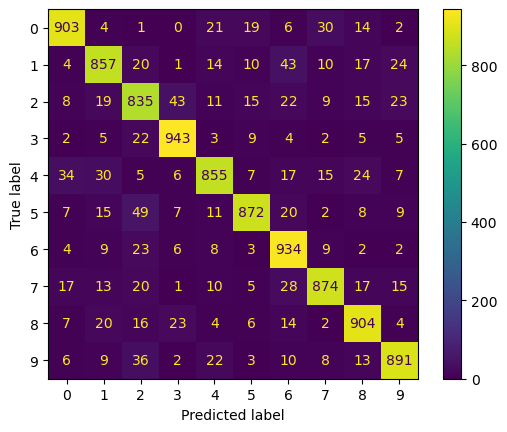

In [44]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred)).plot()